                Лекция 4. Визуализация данных с Matplotlib и Seaborn                

Подключение библиотек и скриптов:

In [25]:
import numpy as np
import pandas as pd

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Считываем датасет
df = pd.read_csv('bank.csv', sep=';')
df.sample(n=10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,convert
25866,30,management,single,tertiary,no,2592,no,no,cellular,19,nov,50,1,-1,0
44643,75,retired,married,primary,no,1413,no,no,cellular,1,sep,532,2,188,1
41124,36,management,single,tertiary,no,609,no,no,cellular,18,aug,33,2,-1,0
5071,32,management,single,tertiary,no,1373,yes,no,unknown,21,may,474,2,-1,0
4782,32,admin.,single,secondary,no,2146,yes,no,unknown,21,may,422,2,-1,0
19702,43,technician,married,tertiary,no,5145,no,no,cellular,7,aug,51,7,-1,0
21972,60,retired,married,secondary,no,208,no,no,cellular,20,aug,70,4,-1,0
28382,32,unemployed,married,secondary,no,869,yes,no,cellular,29,jan,177,1,-1,0
8856,50,technician,married,secondary,no,1616,yes,yes,unknown,4,jun,142,11,-1,0
37667,31,self-employed,single,tertiary,no,17924,yes,no,cellular,14,may,745,1,174,1


Стандартный синтаксис создания графика

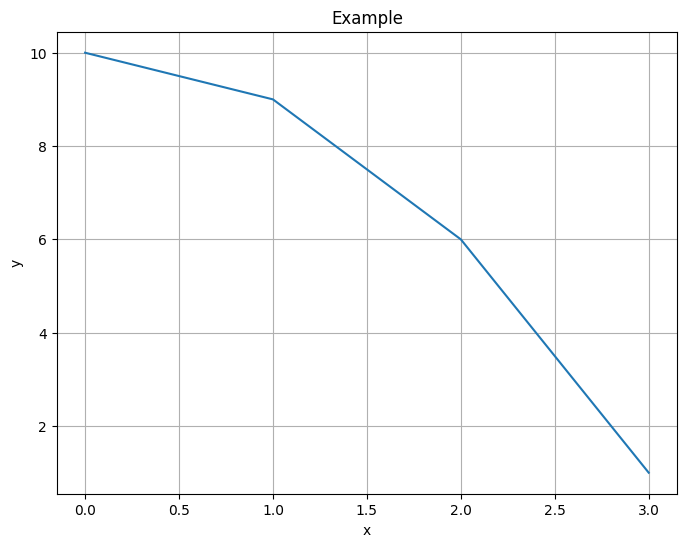

In [28]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1, 2, 3], [10, 9, 6, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example')
plt.grid();

## Виды графиков

### Линейный график

In [40]:
# Готовим данные для графика в виде сводной таблицы

data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data.head()

,month,count
0,apr,2932
1,aug,6247
2,dec,214
3,feb,2649
4,jan,1403


### Matplotlib

Text(0, 0.5, 'Кол-во клиентов')

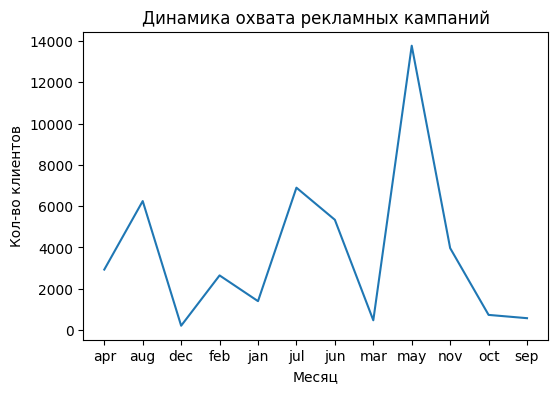

In [30]:
plt.figure(figsize=(6, 4))

plt.plot(data['month'], data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')

### Seaborn

Text(0, 0.5, 'Кол-во клиентов')

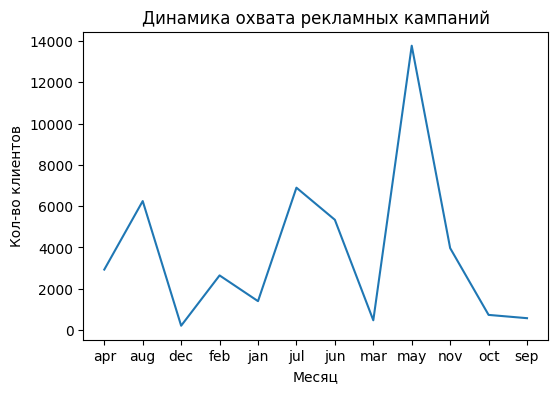

In [31]:
plt.figure(figsize=(6, 4))

sns.lineplot(x=data['month'], y=data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')

## Гистограмма

### Matplotlib

Text(0, 0.5, 'Кол-во клиентов')

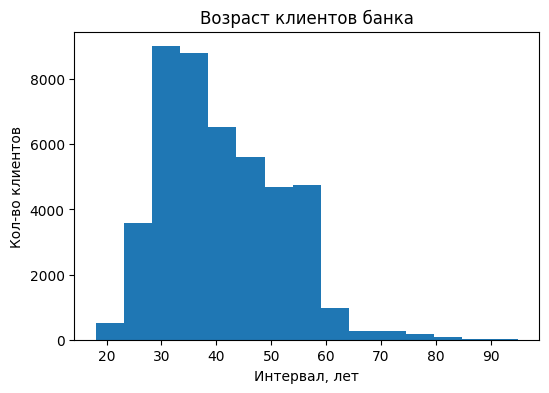

In [32]:
plt.figure(figsize=(6, 4))

plt.hist(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов')

### Seaborn

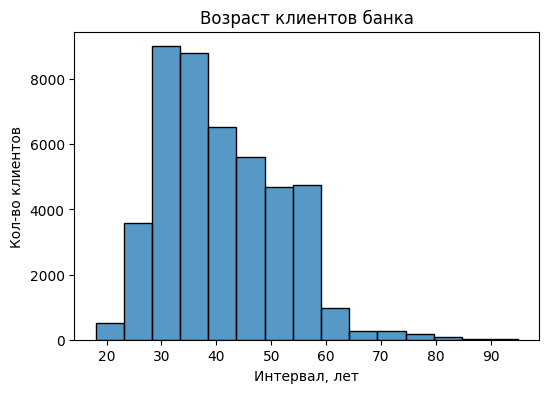

In [33]:
plt.figure(figsize=(6, 4))

sns.histplot(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов');

## Диаграмма рассеяния

In [34]:
# Готовим данные для графика в виде сводной таблицы
data = df.groupby('age')['convert'].sum().reset_index()
data.head()

,age,convert
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


### Matplotlib

Text(0, 0.5, 'Покупки')

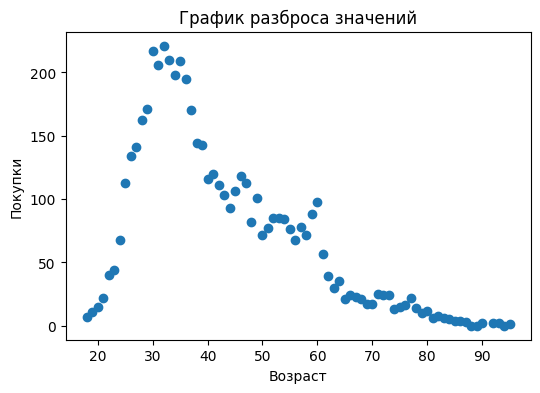

In [35]:
plt.figure(figsize=(6, 4))

plt.scatter(data['age'], data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки')

### Seaborn

Text(0, 0.5, 'Покупки')

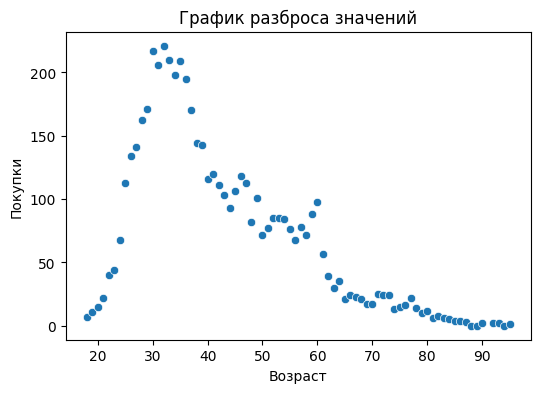

In [36]:
plt.figure(figsize=(6, 4))

sns.scatterplot(x=data['age'], y=data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки')

## Столбчатые диаграммы

In [37]:
# Готовим данные для графика
data = df['job'].value_counts().reset_index()
data.head()

,job,count
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154


### Matplotlib

In [ ]:
plt.figure(figsize=(6, 4))

plt.bar(data['index'], data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

### Seaborn

In [ ]:
plt.figure(figsize=(6, 4))

sns.barplot(x=data['index'], y=data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

## Многорядовые столбчатые диаграммы

In [41]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert']).reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

convert,job,no,yes
1,blue-collar,9024,708
4,management,8157,1301
9,technician,6757,840
0,admin.,4540,631
7,services,3785,369


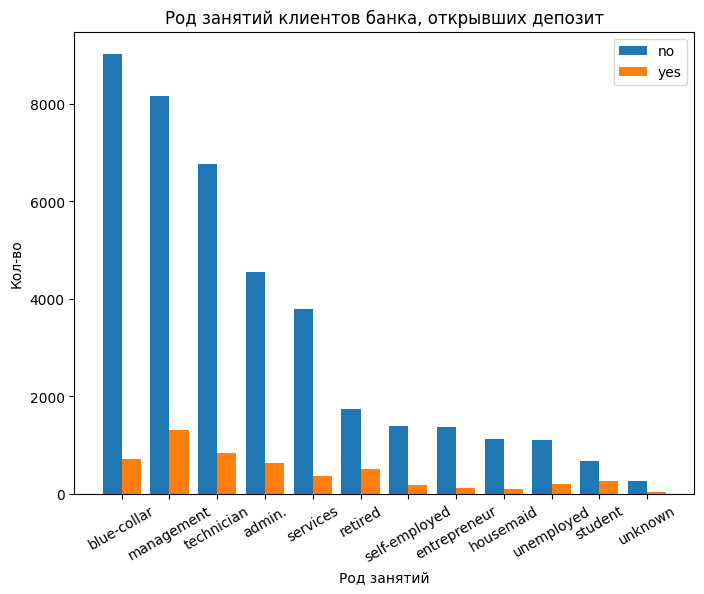

In [42]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['no']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['no', 'yes'])
plt.xticks(n_ticks, data['job'], rotation = 30);  # добавляем метки делений

## Сложенная столбчатая диаграмма

In [43]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert'], normalize='index').reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

convert,job,no,yes
1,blue-collar,0.927250,0.072750
2,entrepreneur,0.917283,0.082717
3,housemaid,0.912097,0.087903
7,services,0.911170,0.088830
9,technician,0.889430,0.110570


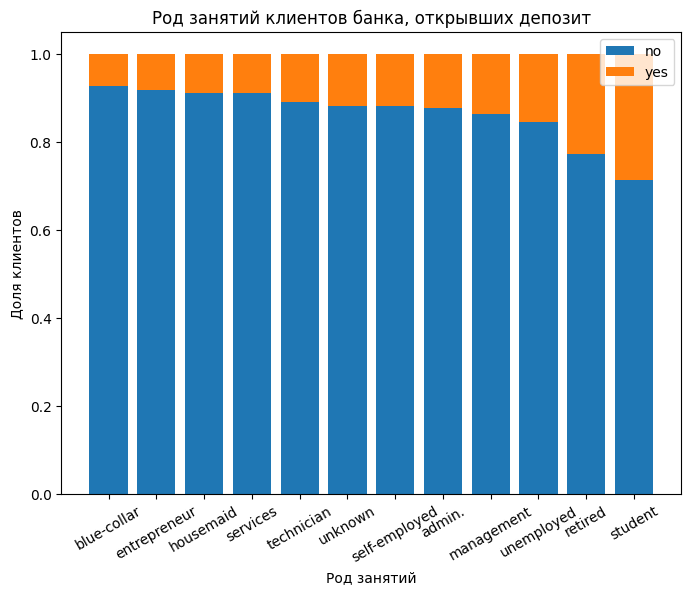

In [44]:
# Строим столбчатую многорядную сложенную диаграмму

plt.figure(figsize=(8, 6))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom=data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Доля клиентов')
plt.legend(['no', 'yes'])
plt.xticks(rotation = 30);

### Ящики с усами

In [45]:
# Готовим данные для графика
data1 = df['duration'][df['convert'] == 1]
data2 = df['duration'][df['convert'] == 0]
data1.head()

83     1042
86     1467
87     1389
129     579
168     673
Name: duration, dtype: int64

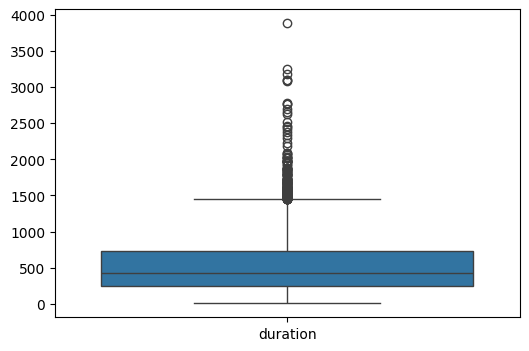

In [46]:
plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1]);

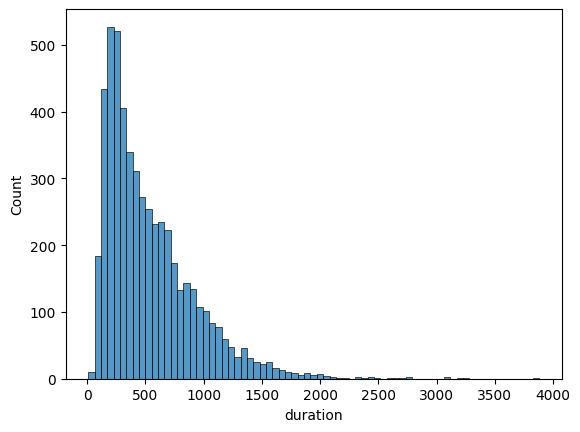

In [47]:
sns.histplot(x=data1);

### Matplotlib

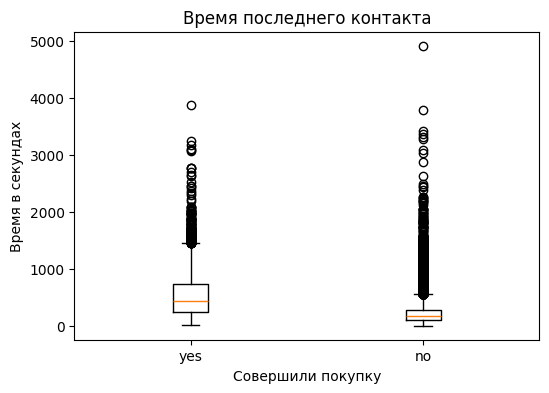

In [48]:
# Строим боксплот

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2])

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

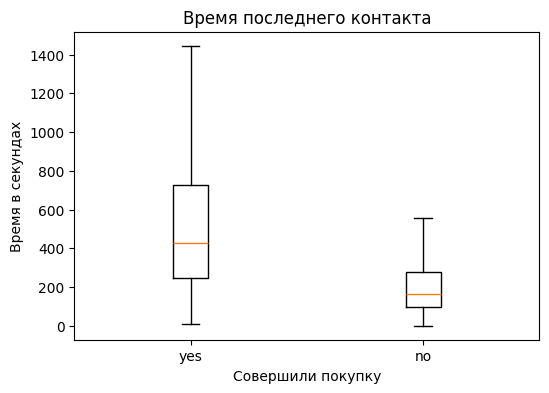

In [49]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

### Seaborn

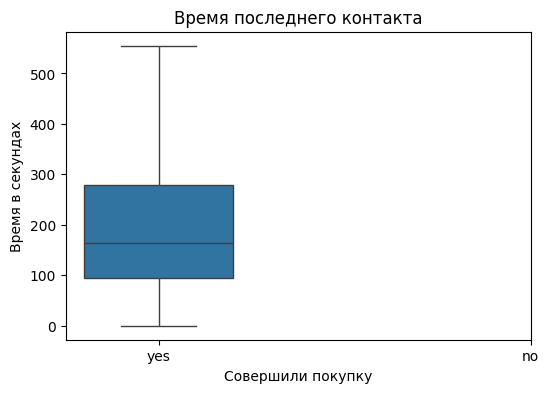

In [75]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([0, 2], ['yes', 'no'])

## Круговая диаграмма

In [55]:
# Готовим данные для графика
data = df['convert'].value_counts()
data.index = ['no', 'yes']
data.head()

no     39922
yes     5289
Name: count, dtype: int64

### Matplotlib

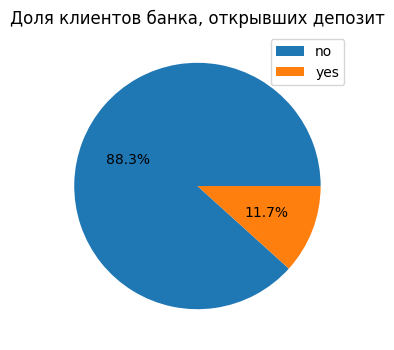

In [56]:
# Строим круговую диаграмму

plt.figure(figsize=(6, 4))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index);

## Визуальный анализ данных

### Описание датасета   

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.   

**longitude** - долгота   
**latitude** - широта   
**housing_median_age** - средний возраст дома   
**total_rooms** - общее количество комнат   
**total_bedrooms** - общее количество спален   
**population** - количество проживающих   
**households** - домохозяйства   
**ocean_proximity** - близость океана   
**median_income** - средний доход    
**median_house_value** - средняя стоимость дома    

P.S. Файл для работы с дальнейшим кодом д.б. housing.csv, но его не приложили к лекциям, поэтому воспользуемся другим файлом с предыдущих лекций: california_housing_test.csv

In [99]:
df = pd.read_csv('california_housing_test.csv', sep=',')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


## Распределение вещественных признаков

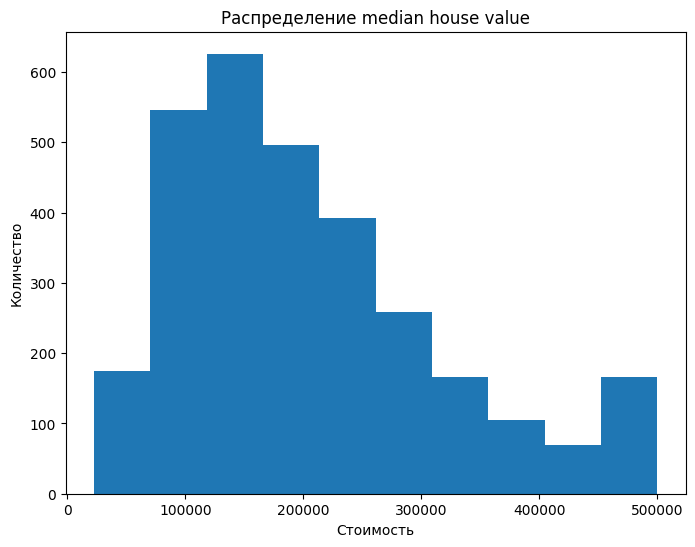

In [100]:
# {'red', 'green', 'blue'} - дискретный признак ('red', 'green', 'blue', 'red', 'green', 'red')
# [0, 100] - вещественный признак (0, 5, 5.6, 10.5, 10.57)
plt.figure(figsize=(8, 6))
plt.hist(df['median_house_value'])
plt.title('Распределение median house value')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

In [101]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('median_house_value', axis=1, inplace=True)

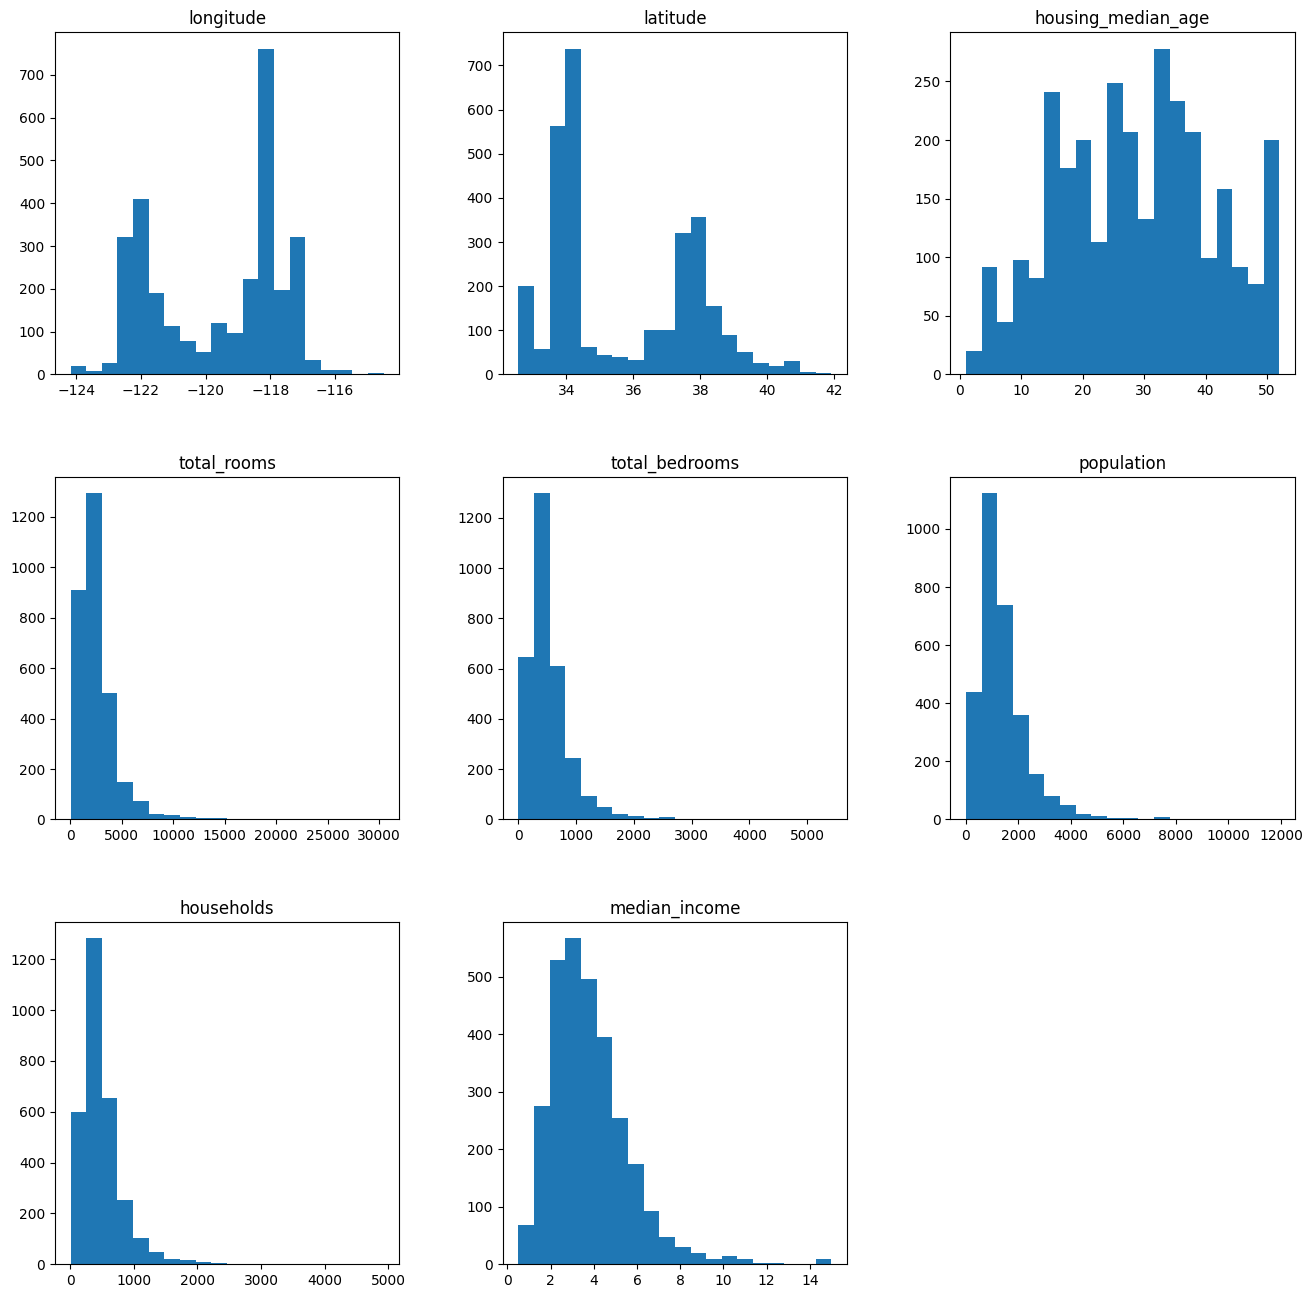

In [102]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

## Поиск выбросов с помощью box plot

### Как строится box plot
 
* box - от 25% до 75% квантиля  
* линия в середине box - медиана  
* "усы"   

### Как строятся "усы" - вариантов масса

* среднее +/- 3 сигма (стандартное отклонение)  
* min / max  
* median +/- 1.5*(q75 - q25),  
* ...  
*Интерквартильный размах = q75 - q25  

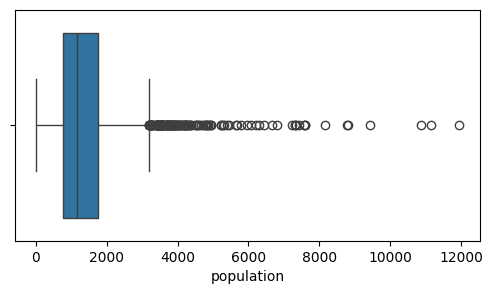

In [103]:
plt.figure(figsize=(6, 3))

sns.boxplot(x=df['population'], whis=1.5)

plt.xlabel('population')
plt.show()

## Анализ категориальных признаков

In [ ]:
counts = df['ocean_proximity'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('ocean_proximity')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show()

In [ ]:
counts = df['INLAND'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('INLAND')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show()

## Анализ взаимных распределений

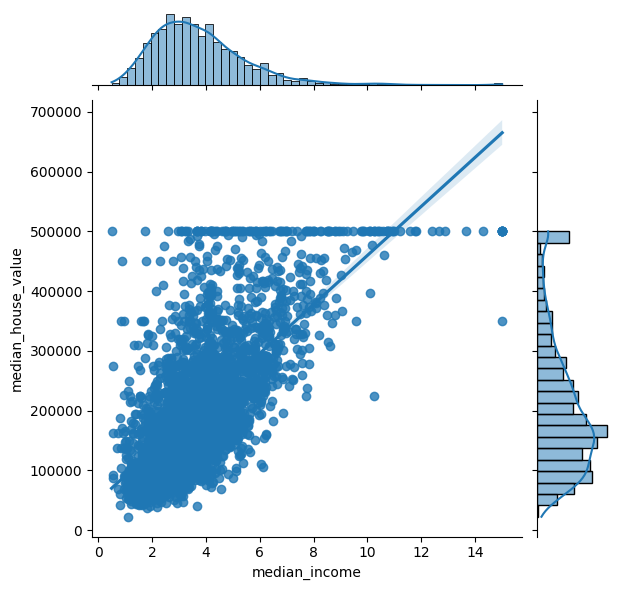

In [105]:
sns.jointplot(x=df['median_income'], y=df['median_house_value'], kind='reg')

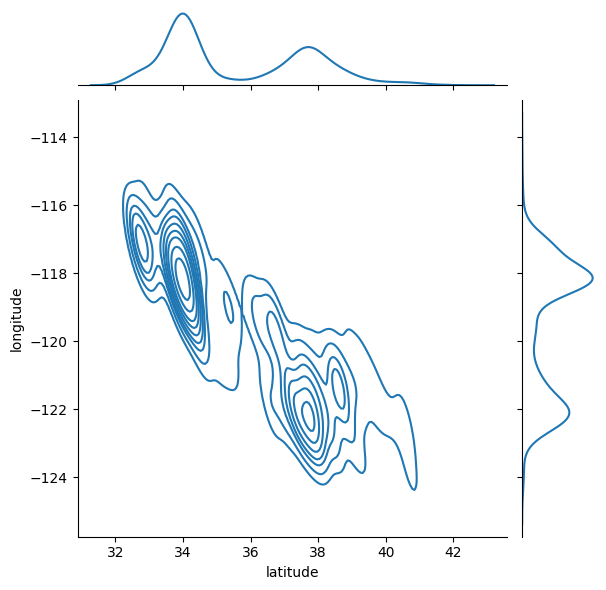

In [106]:
sns.jointplot(x=df['latitude'], y=df['longitude'], kind='kde');

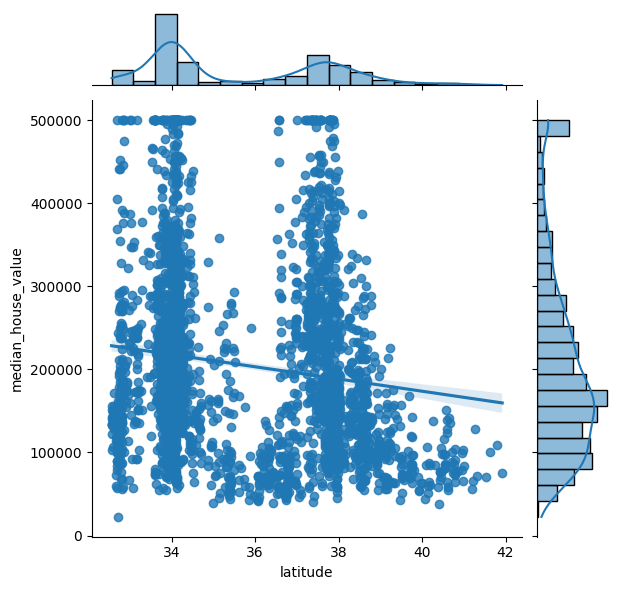

In [107]:
sns.jointplot(x=df['latitude'], y=df['median_house_value'], kind='reg');

Видно два города, имеет смысл посмотреть на зависимость по отдельности

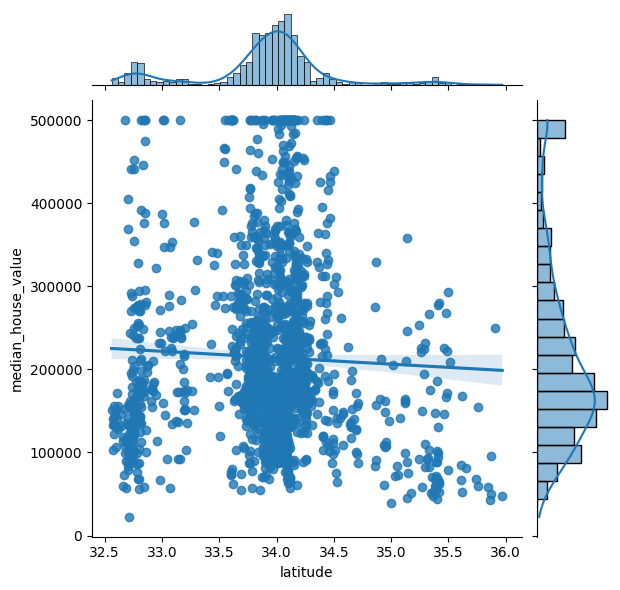

In [108]:
df_cut = df[df['latitude'] < 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg');

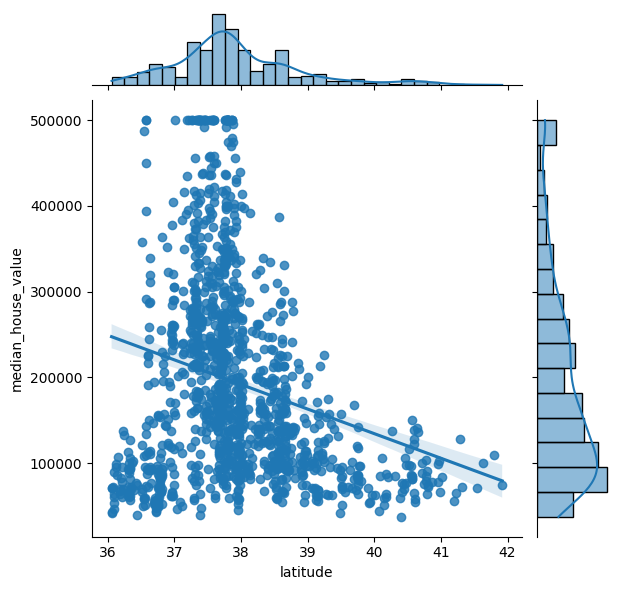

In [109]:
df_cut = df[df['latitude'] >= 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg');

### longitude

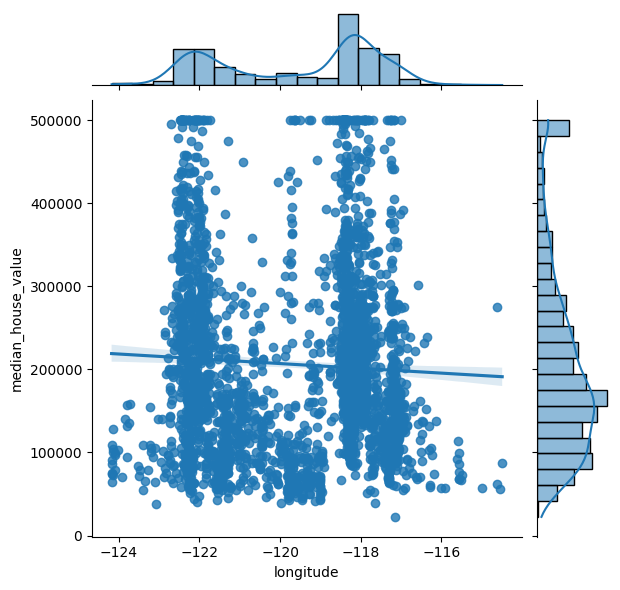

In [110]:
sns.jointplot(x=df['longitude'], y=df['median_house_value'], kind='reg');

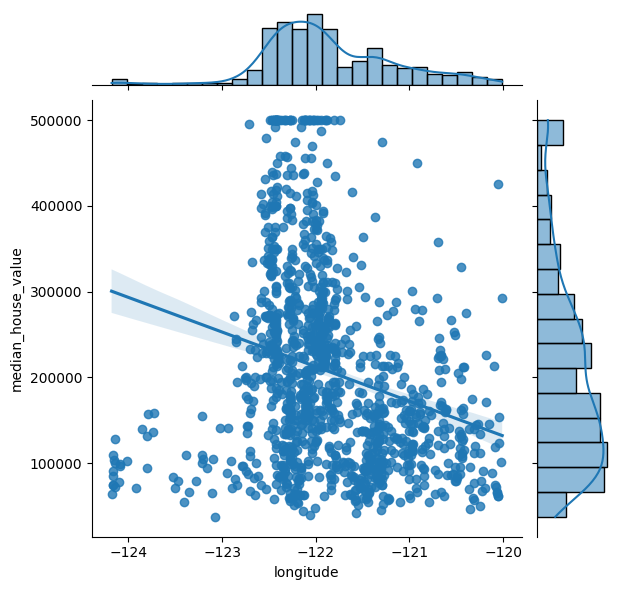

In [111]:
df_cut = df[df['longitude'] < -120]
sns.jointplot(x=df_cut['longitude'], y=df_cut['median_house_value'], kind='reg');

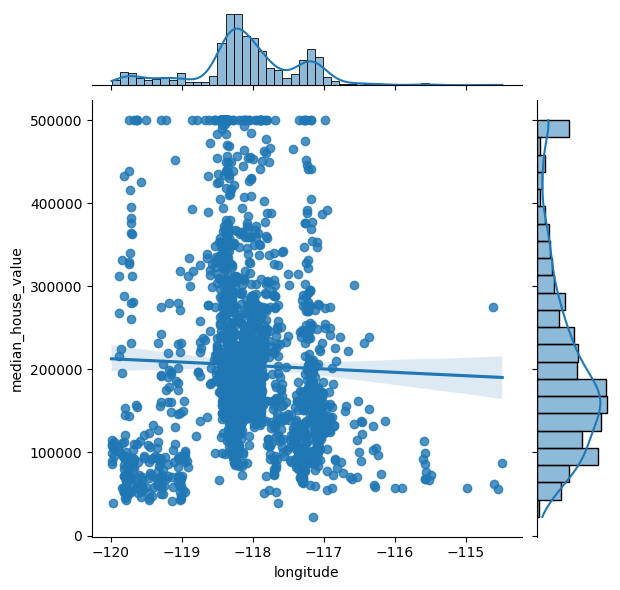

In [112]:
df_cut = df[df['longitude'] >= -120]
sns.jointplot(x=df_cut['longitude'], y=df_cut['median_house_value'], kind='reg');

## Категориальные / бинарные признаки
### box plot

In [ ]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['median_house_value'], y=df['ocean_proximity'], whis=1.5)

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity');

### Как строится box plot  

* box - от 25% до 75% квантиля  
* линия в середине box - медиана  
* "усы"  

### Как строятся "усы" - вариантов масса  

* среднее +/- 3 сигма (стандартное отклонение)  
* min / max  
* median +/- 1.5*(q75 - q25),  
...
*Интерквартильный размах = q75 - q25  

## Матрица корреляций  

* Показывает линейную связь между переменными  
* Изменяется от -1 до 1  
* Корреляция - мера только линейной связи  

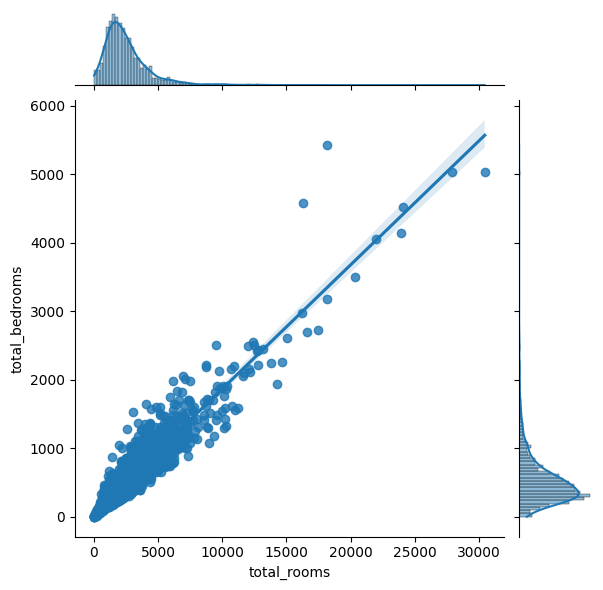

In [114]:
sns.jointplot(x=df['total_rooms'], y=df['total_bedrooms'], kind='reg');

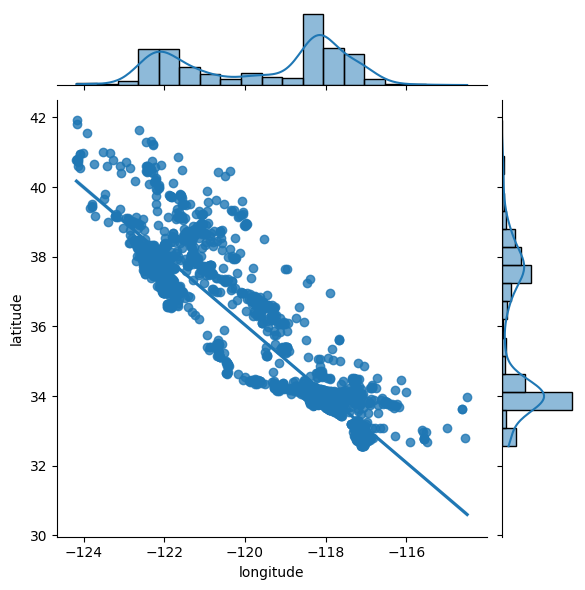

In [115]:
sns.jointplot(x=df['longitude'], y=df['latitude'], kind='reg');

In [116]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.0,-0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
latitude,-0.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
housing_median_age,0.0,0.0,1.0,-0.4,-0.3,-0.3,-0.3,0.0,0.0
total_rooms,0.0,0.0,-0.4,1.0,0.9,0.8,0.9,0.0,0.0
total_bedrooms,0.0,0.0,-0.3,0.9,1.0,0.9,1.0,0.0,0.0
population,0.0,0.0,-0.3,0.8,0.9,1.0,0.9,0.0,0.0
households,0.0,0.0,-0.3,0.9,1.0,0.9,1.0,0.0,0.0
median_income,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.7
median_house_value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,1.0


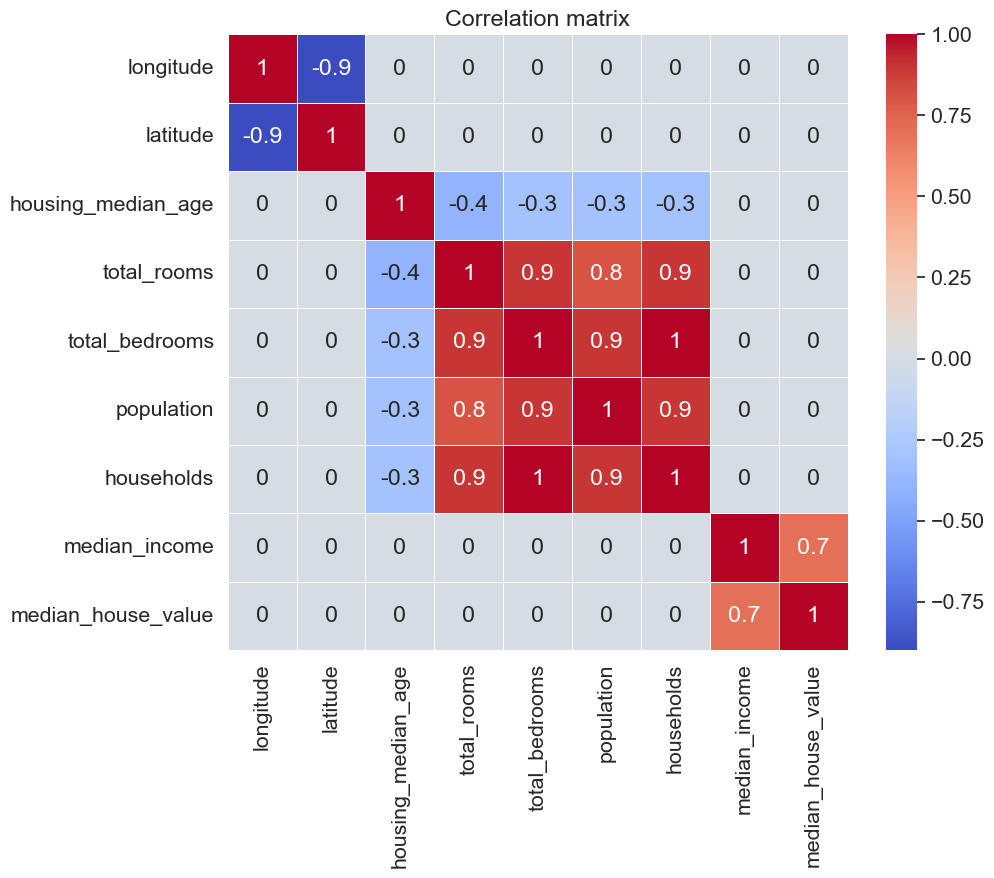

In [117]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

## Гео данные

In [118]:
min_long = -124.55
max_long = -113.80

min_lat = 32.45
max_lat = 42.05

In [ ]:
import matplotlib.image as img
california_map = img.imread('California_Map.png')

plt.figure(figsize=(12, 9))
plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5);

In [ ]:
plt.figure(figsize=(12, 9))

sc = plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c=df['median_house_value'])

plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5)

plt.colorbar(sc)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography");

## Folium

In [ ]:
# !pip install folium

In [ ]:
import folium
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    folium.CircleMarker(
        location=[point.latitude, point.longitude],
        radius=2,
        popup=point.median_house_value
    ).add_to(this_map)
    
df.apply(plotDot, axis=1)

this_map.fit_bounds(this_map.get_bounds())

this_map

## Kepler**

In [ ]:
# !conda install -c conda-forge keplergl

In [ ]:
# !pip install keplergl==0.1.1

In [ ]:
from keplergl import KeplerGl 

map_ = KeplerGl(height=700)
map_.add_data(df, 'Data')
map_.save_to_html(file_name='./california.html')

## Summary   

1. Матрица корреляции  
2. Знакомство с признаками
    * Плотность распределения (sns.distplot/sns.kdeplot/plt.hist - Узнать распределение признака)
    * sns.violinplot - Узнать распределение признака
    * Столбчатая диаграмма (sns.barplot/plt.bar - Узнать распределение категориального признака)
    * Ящик с усами (sns.boxplot/plt.boxplot - Узнать диапазон значений)
    * sns.jointplot - Взаимное изменение признаков
    * plt.pie - Изобразить долю объектов от всего кол-ва  

3. Поиск выбросов  
    * sns.distplot/sns.kdeplot/plt.hist - Искать хвосты слева и справа
    * sns.boxplot - Всё, что выходит за пределы усов - выбросы